In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
X = data.iloc[:, 0:2] 
y = variety

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
lda.predict(X_test)

array([1, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2,
       0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1,
       0])

In [12]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [13]:
result

,0,1
0,1,1
1,2,2
2,0,0
3,2,2
4,2,2
5,1,2
6,2,1
7,1,1
8,0,0
9,2,2


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, lda.predict(X_test))

0.8

In [16]:
lda.coef_

array([[-5.72028941,  7.28241359],
       [ 2.48798593, -4.59620738],
       [ 4.88414632, -4.32988824]])

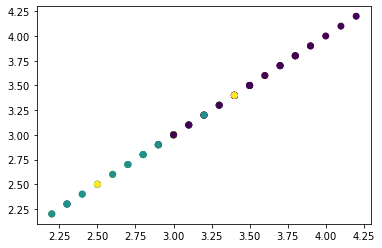

In [17]:
plt.scatter(X_train['sepal width (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [18]:
small_train = X_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]

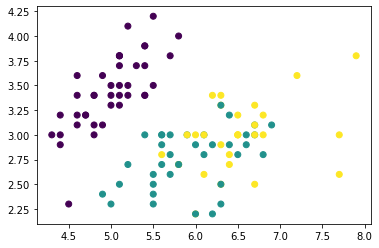

In [19]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

Можем оставить два класса (?)

In [20]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

In [21]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [22]:
lda_small.means_

array([[4.9975    , 3.4425    ],
       [6.52142857, 2.98571429]])

In [23]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

<ipython-input-24-cf10d66a1f90>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


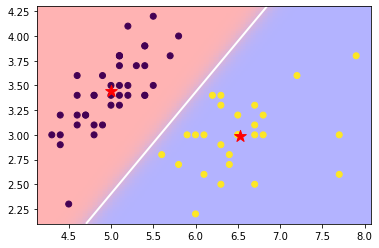

In [24]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [25]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
data_norm = data[['sepal length (cm)', 'sepal width (cm)']]
scaler = StandardScaler()
data_norm[['sepal length (cm)', 'sepal width (cm)']] = scaler.fit_transform(data_norm[['sepal length (cm)', 'sepal width (cm)']])
data_norm

<ipython-input-27-0ce617448279>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_norm[['sepal length (cm)', 'sepal width (cm)']] = scaler.fit_transform(data_norm[['sepal length (cm)', 'sepal width (cm)']])
C:\Users\daria\anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\daria\anaconda3\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

,sepal length (cm),sepal width (cm)
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201
...,...,...
145,1.038005,-0.131979
146,0.553333,-1.282963
147,0.795669,-0.131979
148,0.432165,0.788808


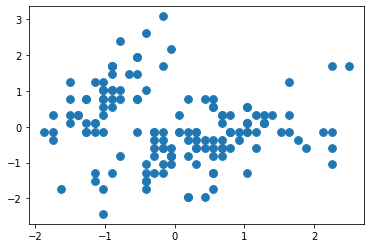

In [30]:
plt.scatter(data_norm['sepal length (cm)'], data_norm['sepal width (cm)'], cmap='autumn', s=60)

In [31]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(data_norm)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

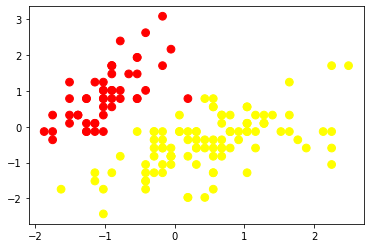

In [35]:
plt.scatter(data_norm['sepal length (cm)'], data_norm['sepal width (cm)'], cmap='autumn', c=clusters, s=60)

In [36]:
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_norm)
    k_inertia.append(clf_kmeans.inertia_)

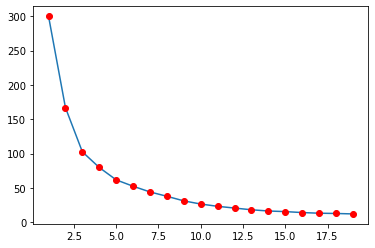

In [37]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')